<a href="https://colab.research.google.com/github/NEBTICS/Robust-Fruit-classification/blob/master/Robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [46]:
!kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.92G/7.92G [03:03<00:00, 28.5MB/s]
100% 7.92G/7.92G [03:03<00:00, 46.3MB/s]


In [53]:
!mkdir Fruits

In [ ]:
!unzip fruit-recognition.zip -d Fruits

In [57]:
import tensorflow as tf
import keras
from keras.preprocessing.image  import ImageDataGenerator

In [102]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255,horizontal_flip='True')
train_set = datagen.flow_from_directory(
    '/content/Fruits',
    target_size=(100,100),
    batch_size=60,
    class_mode='categorical',
    subset='training'
    )

Found 56445 images belonging to 15 classes.


In [103]:
datagen1 = ImageDataGenerator(validation_split=0.2, rescale=1./255)
test_set = datagen1.flow_from_directory(
    '/content/Fruits',
    target_size=(100,100),
    batch_size=60,
    class_mode='categorical',
    subset='validation',
)

Found 14104 images belonging to 15 classes.


In [104]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),input_shape=[100,100,3],activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#third
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#f
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

#flatten
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=15,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 5, 5, 128)       

In [106]:
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(x=train_set,validation_data=test_set,epochs=2)

Epoch 1/2
941/941 [==============================] - 396s 420ms/step - loss: 1.3596 - accuracy: 0.5413 - val_loss: 0.5166 - val_accuracy: 0.8076
Epoch 2/2
941/941 [==============================] - 393s 417ms/step - loss: 0.4049 - accuracy: 0.8571 - val_loss: 0.3256 - val_accuracy: 0.8688


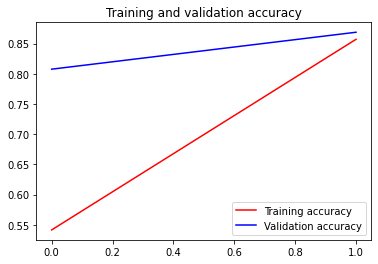

<Figure size 432x288 with 0 Axes>

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [108]:
test_batches = ImageDataGenerator().flow_from_directory('/content/Fruits')

test_labels = []

for i in range(0,3):
    test_labels.extend(np.array(test_batches[i][1]))
import numpy as np
#print(np.argmax(test_labels))    
print(len(test_labels))
x=test_batches.class_indices.keys()

Found 70549 images belonging to 15 classes.
96


In [121]:
x=test_batches.class_indices.keys()
y=[]
for i in range(1):
  y.extend(x)
  
import numpy as np
z=np.array(y)
print(y)
np.save('Fruits Robust',z)


['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya', 'Plum', 'Pomegranate', 'Tomatoes', 'muskmelon']


In [125]:
from keras.preprocessing import image
test_image = image.load_img('/content/Fruits/Orange/Orange001001.png',target_size=(100,100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=np.argmax(result)
d=np.load('/content/Fruits Robust.npy')
print(x)
print(d[x])

6
Orange
